
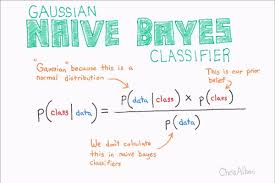

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv(r"C:\50-ML-Challenge-\dataset\spam (1).csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='Category'>

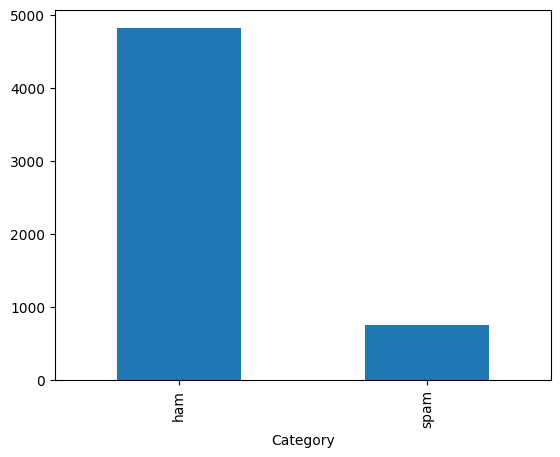

In [4]:
data["Category"].value_counts().plot(kind="bar")

In [7]:
data["Spam"]=data["Category"].apply(lambda x:1 if x=="spam" else 0)

In [ ]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,:2]
y=data.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [18]:
#encoding using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_train=cv.fit_transform(X_train["Message"])
X_test=cv.transform(X_test["Message"])

In [19]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)


MultinomialNB()

In [22]:
ypred=model.predict(X_test)


In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,ypred)*100)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

99.19282511210761
[[966   0]
 [  9 140]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

